In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
pylum = pd.read_csv('../data/rauw/illumina/Pylum-level microbiota.csv')
pylum.head(10)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0020,0.0000,0.0020
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0007,0.0037,0.0000,0.0000,0.0022,0.0000,0.0,0.0007,0.0000,0.0000
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0407,0.0000,0.0,0.0051,0.0000,0.0000
5,UAB 17006,74.4002,10.1792,13.0713,0.0112,0.2280,0.0273,0.0273,0.0048,0.0000,...,0.0016,0.0000,0.0000,0.0000,0.0000,0.1076,0.0,0.0000,0.0032,0.0000
6,UAB 17007,63.0646,0.7472,5.3379,21.2978,0.5354,0.0013,0.0039,0.0013,0.0013,...,0.0000,0.0013,0.0000,0.0000,0.0013,0.0000,0.0,0.0000,0.0000,0.0013
7,UAB 17008,73.9986,9.8571,9.1169,0.0171,2.7578,0.0613,0.0951,0.1077,0.0008,...,0.0020,0.0179,0.0004,0.0004,0.0012,0.0000,0.0,0.0000,0.0000,0.0004
8,UAB 17009,64.7139,1.6725,2.9357,0.0051,11.4486,0.0288,0.0826,0.0023,0.0000,...,0.0017,0.0051,0.0000,0.0000,0.0006,0.0000,0.0,0.0006,0.0006,0.0006
9,UAB 17010,59.5769,28.7744,5.7057,0.0856,3.9442,0.0084,0.4506,0.0365,0.0000,...,0.0126,0.0000,0.0000,0.0014,0.0014,0.0000,0.0,0.0000,0.0000,0.0028


## Fertility & Infertility

In [3]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
pylum['fertility'] = pylum['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
pylum['fertility'] = np.where(pylum['fertility'] == 'CON', 1, 0)

#### PCA

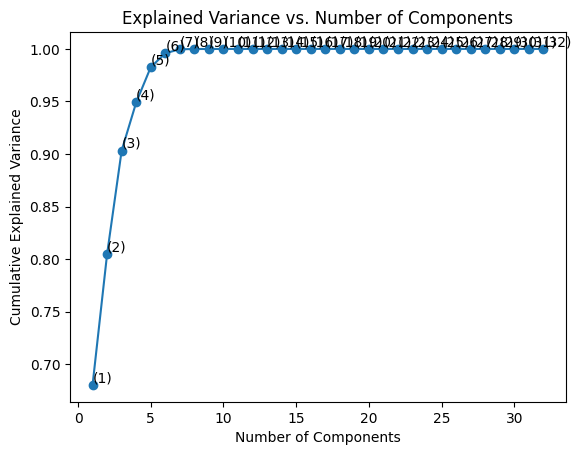

In [4]:
features = pylum.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [5]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

#### KMEANS

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

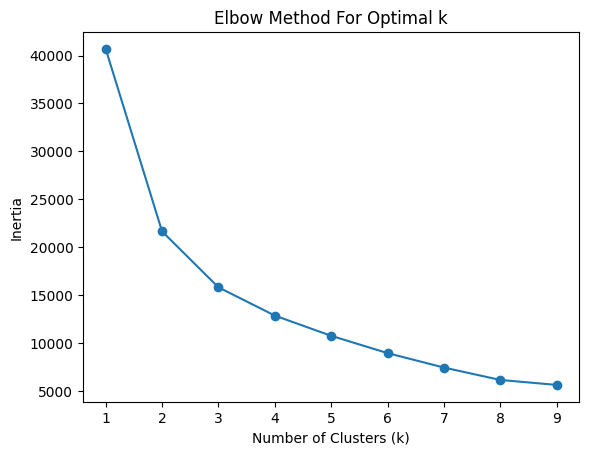

In [6]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


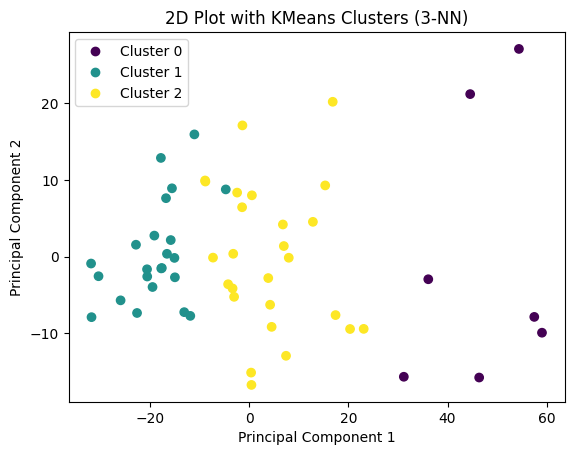

In [7]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [8]:
# Add a new column for each combination of cluster and fertility
pylum['cluster_fertility'] = pylum['cluster'].astype(str) + '_' + pylum['fertility'].astype(str)
pylum.head(5)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0,0.0000,0.0,0.0,0.0020,0.0,0.002,0,0,0_0
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0,0.0022,0.0,0.0,0.0007,0.0,0.000,0,2,2_0
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0,0.0407,0.0,0.0,0.0051,0.0,0.000,0,1,1_0


#### MLP

In [ ]:
X = pylum.drop(['cluster_fertility', 'cluster', 'fertility', 'Sample ID'], axis=1)
y = pylum['cluster_fertility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [14]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

         1_0       0.33      0.33      0.33         3
         1_1       0.00      0.00      0.00         2
         2_0       0.86      1.00      0.92         6
         2_1       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.30      0.33      0.31        12
weighted avg       0.51      0.58      0.54        12

[[1 2 0 0]
 [2 0 0 0]
 [0 0 6 0]
 [0 0 1 0]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


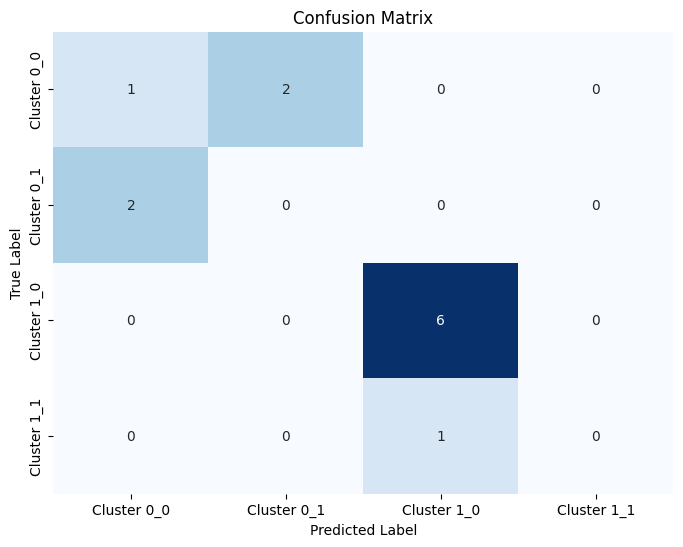

In [15]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ADDING SOME METADATA

In [25]:
clinical = pd.read_csv('../data/rauw/illumina/Sample info + Sperm quality.csv')
clinical.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Life style, intake habits, clinical history",...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Sperm DNA integrity,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
1,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,...,7.5,6.3096,0.38149038461538454,50.75,25.79,0.765,0.6,31,82,2.57552
2,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,...,7.5,4.997999999999999,0.6411062836391933,23.25,42.49,0.885,0.595,33,72,3.42725
3,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
4,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109


In [33]:
clinical.isna().sum()

0
Sample ID                          1
Sample collection date             1
City of birth                      1
City of residence 1                1
City of residence 2               46
Age                                1
Clinical status                    1
Smoker                             6
Alcohol intake                     6
Caffeine (mg/day)                  5
Radiation exposure                 1
Chemical exposure                  1
Diseases                          42
Antibiotics (last month)          45
Abstinence (days)                  8
Volume (mL)                        2
Sperm concentration (M/ml)         4
Total sperm number (x10^6)         4
Total motility (%)                 1
Progressive motility (%)           4
Normal morfology (%)              13
pH                                 2
Seminal viscosity (cps)            3
Normed sORP (mV/10^6 sperm/ml)     7
CMA3+ (%)                          2
TUNEL+ (%)                         3
Alkaline comet OTM                 1

In [35]:
clinical = clinical.drop(['Sample collection date', 'City of residence 2', 
                                      'Clinical status', 'Diseases', 'Antibiotics (last month)',
                                      'Abstinence (days)', 'Normal morfology (%)'], axis=1)

In [39]:
# Change some columns to numeric
clinical['Age'] = pd.to_numeric(clinical['Age'], errors='coerce')

# Select only numeric columns for interpolation
numeric_columns = clinical.select_dtypes(include='number')



# Interpolate missing values
numeric_columns = numeric_columns.interpolate(method='linear', limit_direction='forward')

""
0
1
2
3
4
5
6
7
8
9


In [38]:
# Interpolate NaN values using the default linear method
clinical_inter = clinical.interpolate()

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [36]:
clinical.isna().sum()

0
Sample ID                         1
City of birth                     1
City of residence 1               1
Age                               1
Smoker                            6
Alcohol intake                    6
Caffeine (mg/day)                 5
Radiation exposure                1
Chemical exposure                 1
Volume (mL)                       2
Sperm concentration (M/ml)        4
Total sperm number (x10^6)        4
Total motility (%)                1
Progressive motility (%)          4
pH                                2
Seminal viscosity (cps)           3
Normed sORP (mV/10^6 sperm/ml)    7
CMA3+ (%)                         2
TUNEL+ (%)                        3
Alkaline comet OTM                1
Neutral comet OTM                 1
Alkaline comet (%)                1
Neutral comet (%)                 1
Shannon Index                     1
dtype: int64

In [37]:
# Set the second row as the column names
clinical.columns = clinical.iloc[0]
clinical.head(5)


,Sample ID,City of birth,City of residence 1,Age,Smoker,Alcohol intake,Caffeine (mg/day),Radiation exposure,Chemical exposure,Volume (mL),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
0,Sample ID,City of birth,City of residence 1,Age,Smoker,Alcohol intake,Caffeine (mg/day),Radiation exposure,Chemical exposure,Volume (mL),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
1,UAB 17001,Malaga,[IB] Alcudia,40,0,Sporadic,388,0,0,2.3,...,7.5,6.3096,0.38149038461538454,50.75,25.79,0.765,0.6,31,82,2.57552
2,UAB 17002,[IB] Palma,[IB] Palma,42,0,Frequent,156,0,0,1.3,...,7.5,4.997999999999999,0.6411062836391933,23.25,42.49,0.885,0.595,33,72,3.42725
3,UAB 17003,[VAL] València,[IB] Palma,38,NaN,NaN,NaN,1,1,2.2,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
4,UAB 17004,[Bulgària] Sliven,[IB] Campos,48,NaN,NaN,NaN,0,0,3.7,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109


In [27]:
# Join clinical with pylum using Sample ID
pylum_clinical = pd.merge(clinical, pylum, on='Sample ID')
pylum_clinical.head(5)

,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
1,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,...,0.0,0.0000,0.0,0.0,0.0020,0.0,0.002,0,0,0_0
2,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,...,0.0,0.0022,0.0,0.0,0.0007,0.0,0.000,0,2,2_0
3,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
4,UAB 17005,2017-08-21 00:00:00,Barcelona,[IB] Palma,NaN,39,Infertile,0,Never,0,...,0.0,0.0407,0.0,0.0,0.0051,0.0,0.000,0,1,1_0


In [29]:
# Count the nan values in each column
pylum_clinical.isna().sum()

# Know the columns with nan values
pylum_clinical.columns[pylum_clinical.isna().any()].tolist()

['City of residence 2',
 'Smoker',
 'Alcohol intake',
 'Caffeine (mg/day)',
 'Diseases',
 'Antibiotics (last month)',
 'Abstinence (days)',
 'Volume (mL)',
 'Sperm concentration (M/ml)',
 'Total sperm number (x10^6)',
 'Progressive motility (%)',
 'Normal morfology (%)',
 'pH',
 'Seminal viscosity (cps)',
 'Normed sORP (mV/10^6 sperm/ml)',
 'CMA3+ (%)',
 'TUNEL+ (%)']

In [ ]:
# Drop some columns
pylum_clinical = pylum_clinical.drop(['Sample collection date', 'Sperm quality', 'City of residence 2', 
                                      'Clinical status'], axis=1)